<a href="https://colab.research.google.com/github/korayercan/Algerian-Forest-Fire/blob/main/AlgerianForestFiresDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Algerian_forest_fires_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [ ]:
df.isna().sum()

,0
day,1
month,2
year,2
Temperature,2
RH,2
Ws,2
Rain,2
FFMC,2
DMC,2
DC,2


In [ ]:
df[df.isna().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [ ]:
df.drop(122, inplace = True)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df[df.isna().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [ ]:
df.loc[:122, "Region"] = 0
df.loc[122:, "Region"] = 1

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [ ]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
242,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
245,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [ ]:
df = df.dropna().reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
df["day"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', 'day'],
      dtype=object)

In [ ]:
df[df["day"] == "day"]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [ ]:
df.drop(122, inplace = True)

In [ ]:
df[["day","month","year","Temperature","RH","Ws"]] = df[["day","month","year","Temperature","RH","Ws"]].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), int64(6), object(8)
memory usage: 30.4+ KB


In [ ]:
df[["Rain","FFMC","DMC","DC","ISI","BUI","FWI"]] = df[["Rain","FFMC","DMC","DC","ISI","BUI","FWI"]].astype(float)

In [ ]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [ ]:
df["Classes"].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [ ]:
df["Classes"] = np.where(df["Classes"].str.contains("not fire"),0,1)

In [ ]:
df["Classes"].value_counts()

,count
Classes,
1,137
0,106


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int64  
 14  Region       243 non-null    float64
dtypes: float64(8), int64(7)
memory usage: 30.4 KB


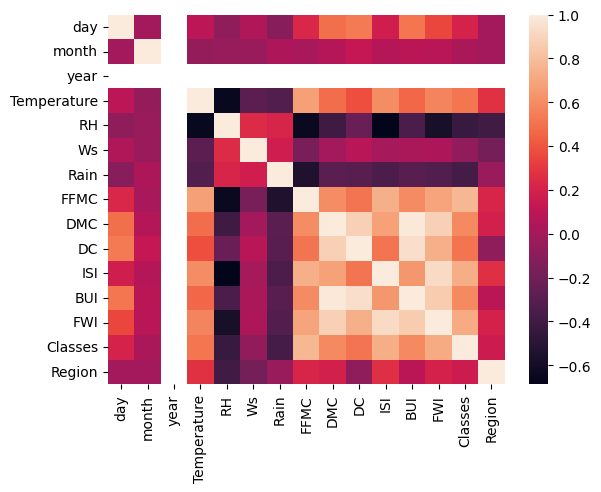

In [ ]:
sns.heatmap(df.corr())
plt.show()

In [ ]:
df.drop(["day","month","year"], axis = 1, inplace = True)


In [ ]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [ ]:
#dependent independent features
X = df.drop("FWI", axis = 1)
y = df["FWI"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 15)

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.644824,-0.322405,-0.222809,0.600615,0.483815,0.362859,0.579809,0.452819,0.463959,0.229479
RH,-0.644824,1.000000,0.205669,0.171031,-0.643767,-0.395535,-0.204568,-0.682107,-0.337032,-0.427947,-0.368402
Ws,-0.322405,0.205669,1.000000,0.152948,-0.135584,0.011874,0.104577,0.021616,0.051452,-0.044791,-0.181246
Rain,-0.222809,0.171031,0.152948,1.000000,-0.475600,-0.263007,-0.282983,-0.325552,-0.276457,-0.363013,0.049735
FFMC,0.600615,-0.643767,-0.135584,-0.475600,1.000000,0.592446,0.483610,0.732549,0.577031,0.770641,0.158505
DMC,0.483815,-0.395535,0.011874,-0.263007,0.592446,1.000000,0.871387,0.658793,0.980646,0.549624,0.153781
DC,0.362859,-0.204568,0.104577,-0.282983,0.483610,0.871387,1.000000,0.467977,0.939248,0.468011,-0.120874
ISI,0.579809,-0.682107,0.021616,-0.325552,0.732549,0.658793,0.467977,1.000000,0.617313,0.714801,0.241664
BUI,0.452819,-0.337032,0.051452,-0.276457,0.577031,0.980646,0.939248,0.617313,1.000000,0.550431,0.044453
Classes,0.463959,-0.427947,-0.044791,-0.363013,0.770641,0.549624,0.468011,0.714801,0.550431,1.000000,0.136752


In [ ]:
#redundancy, multicollinearity, overfitting -> if there are high relation corr rate between columns

In [ ]:
def corr_for_dropping(df, threshold):
  columns_to_drop = set()
  corr = df.corr()
  for i in range(len(corr.columns)):
    for j in range(i):
      if abs(corr.iloc[i,j]) > threshold:
        columns_to_drop.add(corr.columns[i])
  return columns_to_drop

In [ ]:
corr_for_dropping(X_train, 0.85)

{'BUI', 'DC'}

In [ ]:
X_train.drop(corr_for_dropping(X_train, 0.85), axis = 1, inplace = True)
X_test.drop(corr_for_dropping(X_test, 0.85), axis = 1, inplace = True)

In [ ]:
X_train.shape

(182, 9)

In [ ]:
X_test.shape

(61, 9)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

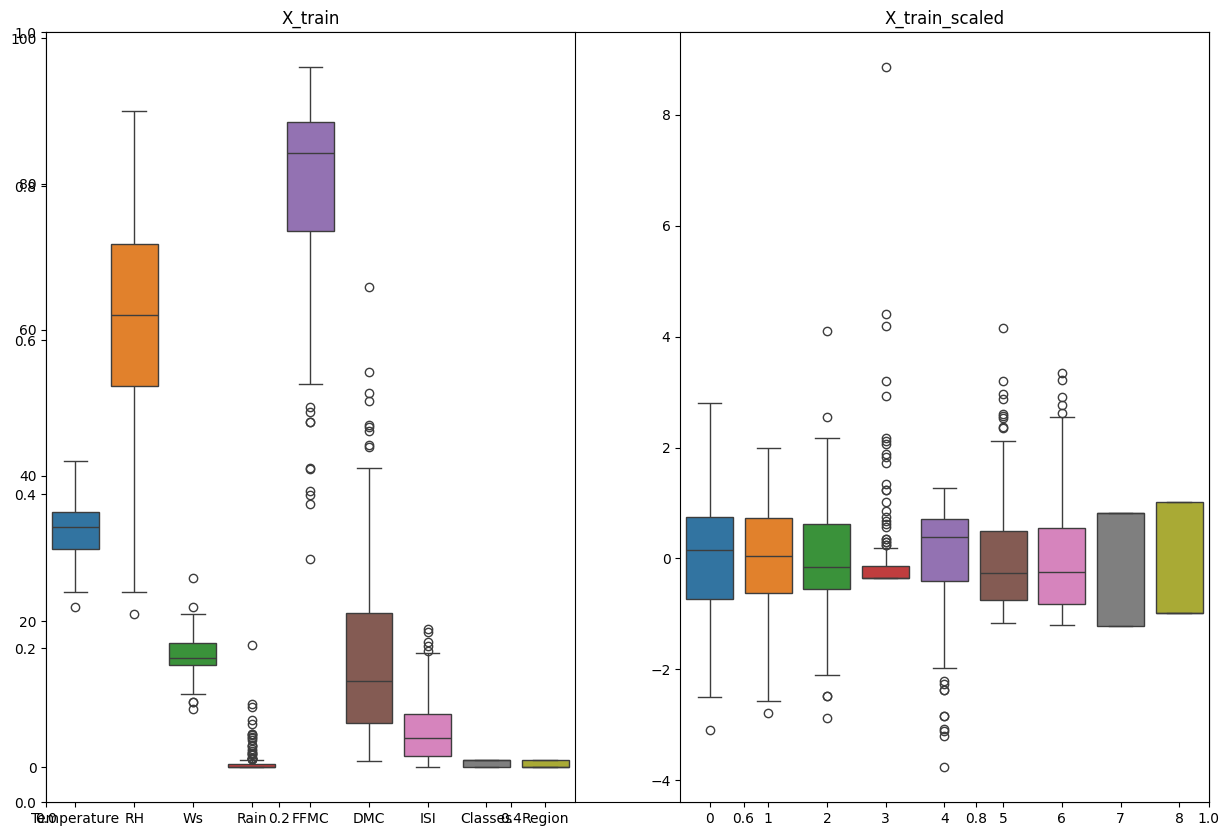

In [ ]:
plt.subplots(figsize = (15,10))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train_scaled")
plt.show()

Mean Absolute Error: 0.7036011729575926
Mean Squared Error: 0.8764163698605988
R2 Score: 0.9838729275348057


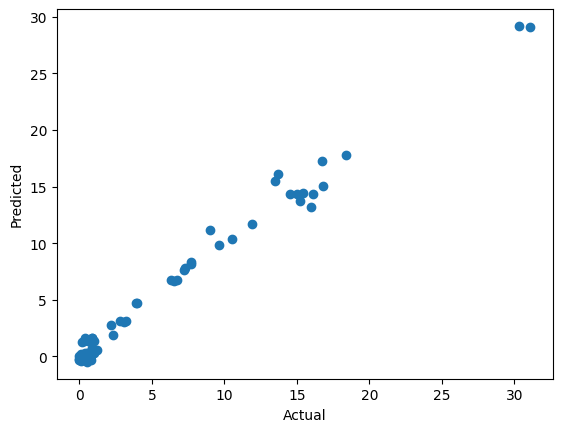

In [ ]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)
y_pred = linear.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Mean Absolute Error: 1.216272633800629
Mean Squared Error: 2.6029377368132196
R2 Score: 0.9521029422229386


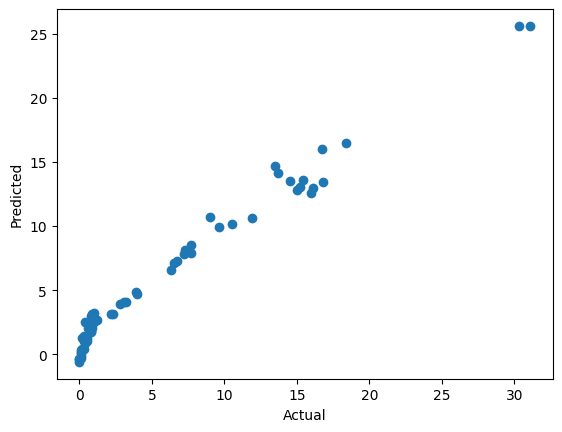

In [ ]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Mean Absolute Error: 0.709354244870332
Mean Squared Error: 0.8868348464263088
R2 Score: 0.9836812155445575


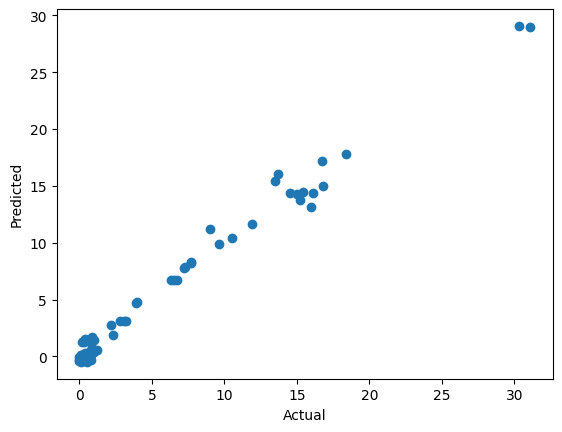

In [ ]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Mean Absolute Error: 1.749328647109016
Mean Squared Error: 5.569160502382824
R2 Score: 0.8975210207375391


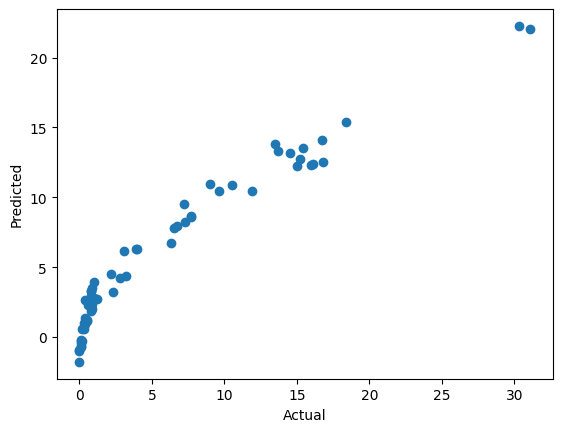

In [ ]:
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [ ]:
# lasso cross validation

In [ ]:
from sklearn.linear_model import LassoCV

Mean Absolute Error: 0.7222308156305418
Mean Squared Error: 0.8972011670293636
R2 Score: 0.9834904632842026


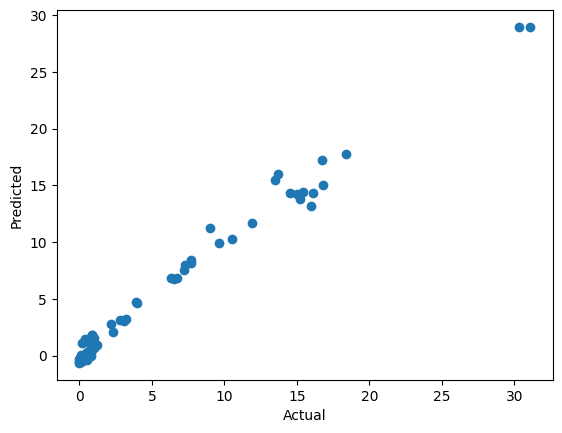

In [ ]:
lassocv = LassoCV(cv = 5)
lassocv.fit(X_train_scaled, y_train)
y_pred = lassocv.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [ ]:
lassocv.alpha_

np.float64(0.031548475118595085)

In [ ]:
# ridge cross validation

In [ ]:
from sklearn.linear_model import RidgeCV

Mean Absolute Error: 0.709354244870332
Mean Squared Error: 0.8868348464263088
R2 Score: 0.9836812155445575


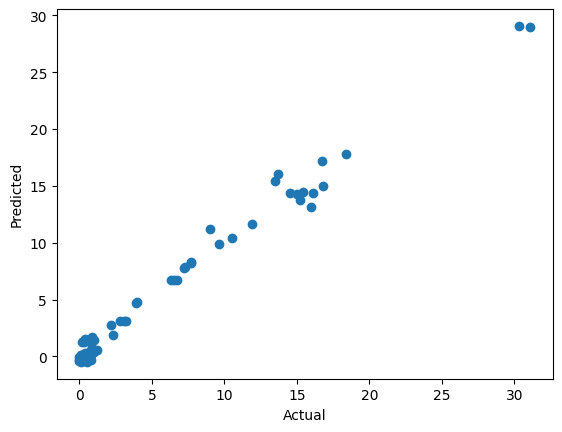

In [ ]:
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [ ]:
# elasticNet cross validation

In [ ]:
from sklearn.linear_model import ElasticNetCV

Mean Absolute Error: 0.7354284604918176
Mean Squared Error: 0.9249125778630378
R2 Score: 0.9829805413498388


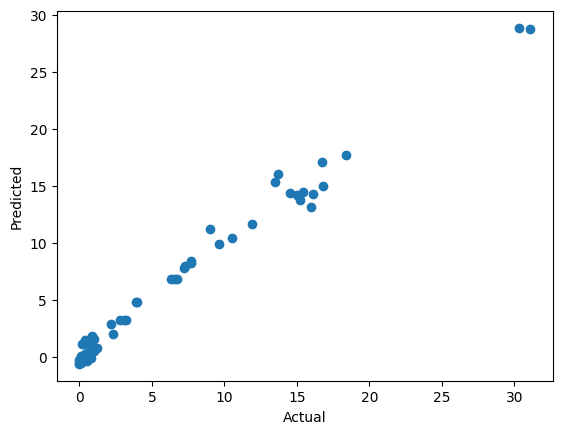

In [ ]:
elasticcv = ElasticNetCV(cv = 5)
elasticcv.fit(X_train_scaled, y_train)
y_pred = elasticcv.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()